# CAPSTONE PROJECT

## MACHINE LEARNING NANO DEGREE
### FOREST FIRES

Shaik Asiff, Feb 20, 2019

### DEFINITION
#### Project Overview :
One major environmental concern is the occurrence of forest ﬁres (also called wildﬁres), which affect forest preservation, create economical and ecological damage and cause human suffering. Such phenomenon is due to multiple causes (e.g. human negligence and lightnings) and despite an increasing of state expenses to control this disaster, each year millions of forest hectares (ha) are destroyed all around the world. In particular, Portugal is highly affected by forest ﬁres. From 1980 to 2005, over 2.7 million ha of forest area (equivalent to the Albania land area) have been destroyed.

The aim of the project is know how much amount of area in forest is burnt due to forest fire, so that next we can predict the occurence of forest fire based on the attribute values we used to predict the area. Historically some works has been done on this by Cortez and Morais in 2007 as mentioned in here: https://archive.ics.uci.edu/ml/datasets/forest+fires. In this case a machine leaarning algorithm is trained and tested for the solution.

### PROBLEM STATEMENT
#### The problem statement can be formally defined as:
From my selected dataset which consists of 517 datapoints with 13 different attributes, I am going to predict the amount of area of the forest which is burnt from forestﬁre. By the use of this dataset I deﬁne the models like regressors and I perform the tests on each model and ﬁnd the best model based on their regression score.

For this problem I'm going to use the regression models of machine learning which I learnt in Udacity MLND.  


#### Relevant Sources:
  [Cortez and Morais, 2007] P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artiﬁcial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artiﬁcial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.


### STRATEGY
This data set seem to be a simple example for regression. All we have to do is check our features, if there are null or non-integer datapoints we have to replace them with relevant integers. We use machine learning regression to get good predictions by selecting good performing regression. The exact details are mentioned in the coming parts.  

### METRICS
As I'm dealing with regression type of data set, I have many evaluation metrics like r2, explained_variance, mean_absolute_error etc,. But, for now I want to use *explained_variation_score* as my evaluation metric and also *mean_absolute_error* for confirmation. I chose to use these metrics because *explained_variance* measures the proportion to which a mathematical model accounts for the variation (dispersion) of a given data set. The more proportion we get the more accurate our model works. Mean_absolute_error it shows the absolute error, the error here refers to *actualvalue - predictedvalue*. If we consider the absolute of this error, say only quantity, then the model highest *explained_variance_score* must have less *mean_absolute_error*. In this way I confirm my evaluation metric.
The sources that infuenced me to chose these are: https://en.wikipedia.org/wiki/Explained_variation, https://medium.com/@ewuramaminka/mean-absolute-error-mae-machine-learning-ml-b9b4afc63077 

### ANALYSIS
#### Exploration of Data
Here I'm importing dataset and analyzing the features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ffd = pd.read_csv('forestfires.csv')

This dataset contains 13 features as given below:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make 
sense to model with the logarithm transform).



In [3]:
ffd.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

Here I'm checking whether there are any null points in of the above features in the dataset.

In [4]:
ffd.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

All features expect 'month' and 'day' are integers. So, I'm going to convert the months and days to their respective number i.e, jan as 1, feb as 2,... and monday as 1, tuesday as 2,..etc,.

In [5]:
ffd.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
ffd.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [6]:
ffd.head()

X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

A brief description of parameters of dataset, including parameters like mean, min, max, standard deviation are given below:

In [7]:
ffd.describe()

X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.649903    4.336557    7.489362    4.297872   90.530561  117.713540   
std      2.362347    1.225883    2.295594    2.061143    5.474022   71.068188   
min      1.000000    2.000000    1.000000    1.000000   18.700000    1.100000   
25%      2.000000    4.000000    7.000000    2.000000   90.200000   73.200000   
50%      4.000000    4.000000    8.000000    5.000000   91.600000  108.400000   
75%      7.000000    5.000000    9.000000    6.000000   92.500000  149.300000   
max      9.000000    9.000000   12.000000    7.000000   96.000000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   556.349130    8.741586   18.425145   45.241779    3.978143    0.002708   
std    250.788852    4.335797    5.563606   16.462594    1.770715    0.045669   
min      7.900000    0.000000    2.200000   15.000000    0.400000    0.000000   
25%    466.300000    6.300000   15.400000   33.000000    2.700000    0.000000   
50%    668.000000    8.200000   19.100000   43.000000    4.000000    0.000000   
75%    715.100000   10.200000   22.200000   54.000000    4.900000    0.000000   
max    860.600000   56.100000   30.800000  100.000000    9.400000    1.000000   

              area  
count   517.000000  
mean     13.403037  
std      70.734121  
min       0.000000  
25%       0.000000  
50%       0.330000  
75%       6.300000  
max    1090.840000

In [8]:
ffd.shape

(517, 13)

#### Exploratory Visualization
Here we're checking the correlation among the features.

In [9]:
ffd.corr(method='pearson')

X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.548021 -0.060547 -0.039437 -0.012434 -0.021969 -0.064327   
Y      0.548021  1.000000 -0.059328 -0.000636 -0.043094  0.037655 -0.096550   
month -0.060547 -0.059328  1.000000 -0.025133  0.327857  0.457163  0.873743   
day   -0.039437 -0.000636 -0.025133  1.000000 -0.004759  0.109672  0.023078   
FFMC  -0.012434 -0.043094  0.327857 -0.004759  1.000000  0.353600  0.351267   
DMC   -0.021969  0.037655  0.457163  0.109672  0.353600  1.000000  0.684680   
DC    -0.064327 -0.096550  0.873743  0.023078  0.351267  0.684680  1.000000   
ISI    0.014309 -0.038662  0.212832  0.074251  0.505227  0.249663  0.236584   
temp  -0.022803  0.003530  0.405348  0.067926  0.441259  0.460281  0.522605   
RH     0.048076  0.056362 -0.106622  0.120269 -0.309249  0.098459 -0.053223   
wind   0.011556 -0.021067 -0.082037  0.033966 -0.025249 -0.090342 -0.200192   
rain   0.062694  0.011382 -0.008967  0.053179  0.012692  0.031994  0.004205   
area   0.081061  0.086127  0.060659  0.020303  0.055788  0.087978  0.061922   

            ISI      temp        RH      wind      rain      area  
X      0.014309 -0.022803  0.048076  0.011556  0.062694  0.081061  
Y     -0.038662  0.003530  0.056362 -0.021067  0.011382  0.086127  
month  0.212832  0.405348 -0.106622 -0.082037 -0.008967  0.060659  
day    0.074251  0.067926  0.120269  0.033966  0.053179  0.020303  
FFMC   0.505227  0.441259 -0.309249 -0.025249  0.012692  0.055788  
DMC    0.249663  0.460281  0.098459 -0.090342  0.031994  0.087978  
DC     0.236584  0.522605 -0.053223 -0.200192  0.004205  0.061922  
ISI    1.000000  0.353183 -0.122822  0.122022  0.057370  0.036014  
temp   0.353183  1.000000 -0.550957 -0.244390  0.002172  0.127302  
RH    -0.122822 -0.550957  1.000000  0.058526  0.121309 -0.103883  
wind   0.122022 -0.244390  0.058526  1.000000  0.104262  0.014967  
rain   0.057370  0.002172  0.121309  0.104262  1.000000 -0.011257  
area   0.036014  0.127302 -0.103883  0.014967 -0.011257  1.000000

'temp' has the highest correlation with the area of forest fire(which is a positive correlation), followed by 'RH' also a positive correlation, 'Rain' has the least correlation

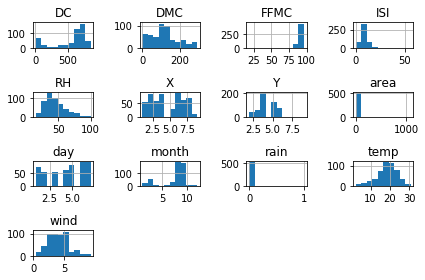

In [10]:
ffd.hist()
plt.tight_layout()

In 'area' plot, most of the dataset's samples fall between 0 and 200 of 'Area' output class, with majority being less than 100.

'Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

I'm going to plot density curve for visualization

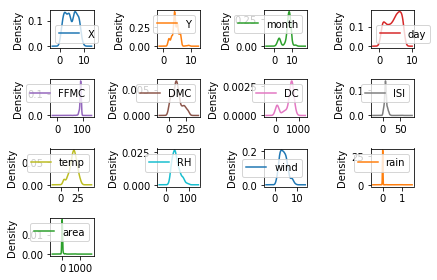

In [11]:
ffd.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.tight_layout()

I'm also plotting the same curve in 'box' form.

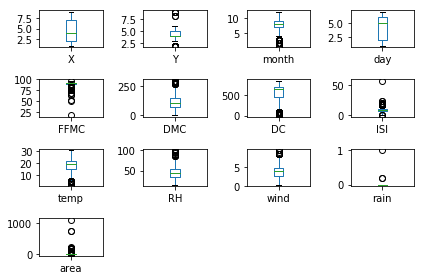

In [12]:
ffd.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.tight_layout()

C:\Users\ASIFF\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.
C:\Users\ASIFF\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


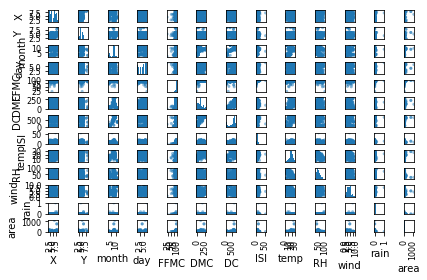

In [13]:
pd.tools.plotting.scatter_matrix(ffd)
plt.tight_layout()

Now, we are going to visualize the correlation among the features using a heat map

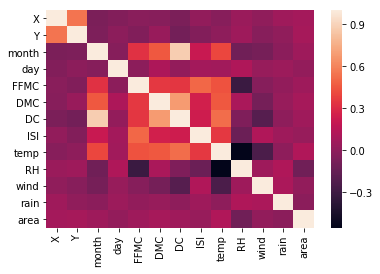

In [14]:
sns.heatmap(ffd.corr())

'temp' has the highest correlation with the area of forest fire(which is a positive correlation), followed by 'RH' also a positive correlation, 'Rain' has the least correlation

### ALGORITHMS AND TECHNIQUES


I've selected two regressors of machine learning i.e, DecisionTreeRegressor and RandomForestRegressor based on the dataset which is of regression type. I've selected these regressors because first of all, these are from different families i.e, RandomForest is from ensemble and DecisionTree is from tree and the detail explanation of regressors and their pros and cons are discussed below. The choice of seleting these two algorithms is influenced by this source: https://towardsdatascience.com/selecting-the-best-machine-learning-algorithm-for-your-regression-problem-20c330bad4ef

##### Regression Trees and Random Forests
Beginning with the base case, a Decision Tree is an intuitive model where by one traverses down the branches of the tree and selects the next branch to go down based on a decision at a node. Tree induction is the task of taking a set of training instances as input, deciding which attributes are best to split on, splitting the dataset, and recurring on the resulting split datasets until all training instances are categorized. While building the tree, the goal is to split on the attributes which create the purest child nodes possible, which would keep to a minimum the number of splits that would need to be made in order to classify all instances in our dataset. Purity is measured by the concept of information gain, which relates to how much would need to be known about a previously-unseen instance in order for it to be properly classified. In practice, this is measured by comparing entropy, or the amount of information needed to classify a single instance of a current dataset partition, to the amount of information to classify a single instance if the current dataset partition were to be further partitioned on a given attribute.

Random Forests are simply an ensemble of decision trees. The input vector is run through multiple decision trees. For regression, the output value of all the trees is averaged; for classification a voting scheme is used to determine the final class.

Pros:

Great at learning complex, highly non-linear relationships. They usually can achieve pretty high performance, better than polynomial regression and often on par with neural networks.
Very easy to interpret and understand. Although the final trained model can learn complex relationships, the decision boundaries that are built during training are easy and practical to understand.

Cons:

Because of the nature of training decision trees they can be prone to major overfitting. A completed decision tree model can be overly-complex and contain unnecessary structure. Though this can sometimes be alleviated using proper tree pruning and larger random forest ensembles.
Using larger random forest ensembles to achieve higher performance comes with the drawbacks of being slower and requiring more memory.

### DATA PREPROCESSESING
The overall data is not good, we can see some skewed distributions in previous scatter matrix plot. So, now I want to preprocess my data using *StandardScaler* which is imported from *sklearn.preprocessing*. This *StandardScaler* transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. 

Here I split my data using train_test_split method from sklearn.model_selection to get my test and train datasets.Here I used a ratio of **9:1**. As my data set is small and contains only 517 datapoints I used this ratio. If we used more than this ratio we will get less datapionts for testing. So, I used this ratio.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

array = ffd.values
X = array[:,0:12] 
Y = array[:,12] 
Y_transform = np.log(Y+1)
scaler = StandardScaler().fit(X)
rescaledX = scaler.fit_transform(X) 
np.set_printoptions(precision=3) 
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y_transform, test_size=0.1,shuffle=False)
print(rescaledX[0:5,:])

[[ 0.996  0.542 -1.958  0.341 -0.792 -1.289 -1.844 -0.841 -1.84   0.35
   1.539 -0.059]
 [ 0.996 -0.275  1.095 -1.116  0.013 -1.159  0.45  -0.471 -0.076 -0.744
  -1.74  -0.059]
 [ 0.996 -0.275  1.095  0.827  0.013 -1.042  0.521 -0.471 -0.688 -0.744
  -1.514 -0.059]
 [ 1.419  1.358 -1.958  0.341  0.214 -1.189 -1.911  0.06  -1.822  3.147
   0.012  4.324]
 [ 1.419  1.358 -1.958  1.312 -0.225 -0.935 -1.813  0.198 -1.264  3.269
  -1.231 -0.059]]


As we observe the values of area, they are highly skewed. Almost all values are 0 and non-zero values values are less, so I want to apply *log transform* to the values of area so that I can make them normally distributed. Now, we can predict them easily.

### BENCHMARK MODEL
Some models are created before to predict the area of forest burnt due to forest fire and one such model is here: https://archive.ics.uci.edu/ml/datasets/forest+fires i.e, In [Cortez and Morais, 2007], the output ’area’ was ﬁrst transformed with a ln(x+1) function. Then,several DataMining methods were applied. After ﬁtting the models, the outputs were postprocessed with the inverse of the ln(x+1) transform. Four different input setups were used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:12.71 +- 0.01 (mean and conﬁdence interval within 95% using a t-student distribution). The best RMSE was attained by the naive mean predictor. An analysis to the regression error curve (REC) shows that the SVM model predicts more examples within a lower admitted error.

Now I'm going to use the KNN classifier as my benchmark model for this dataset and try improve its performance by using regressors like randomforest and decisiontree.

I chose to use KNN regressor because I was influenced by this source: https://www.antoniomallia.it/on-implementing-k-nearest-neighbor-for-regression-in-python.html

In [16]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
print(explained_variance_score(y_test,pred))

0.18807950722220412


C:\Users\ASIFF\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Using my benchmark model I got benchmark score as 18.8%.

### IMPLEMENTATION
Now I have my benchmark score and my aim is to train the dataset with good regressor and make good predictioins better than my benchmark score.

So, I want to take the models DecisionTreeRegressor and RandomForestRegressor with appropriate parameters and make predictions. Here, I am using my metrics *explained_variance_score* and *mean_absolute_error* as confirmation score. 

In [17]:
from sklearn.grid_search import GridSearchCV

C:\Users\ASIFF\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ASIFF\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [18]:
models=[]
names = []
results = []
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))

In [19]:
for name, model in models:
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    results.append(mae)
    names.append(name)
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)


DTR: 0.910441 (0.107341)
RFR: 0.801844 (0.455894)


So, here I got nice scores for both model as they are better than my benchmark score. I've got 91.04% for DecisionTreeRegressor and 80.18% for RandomForestRegressor. Now, I have a DecisionTreeRegressor as larger accurate model compared to RandomForestRegressor, I want to test the robustness of the DecisionTreeRegressor.

### Result

Finally I got higher score for the DecisionTreeRegressor. So, I'm going to check the score for different random_states and take the mean and variance of all different scores.

In [20]:
robust_result=[]
for i in range(1000):
    model=DecisionTreeRegressor()
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions,y_test)
    results.append(mae)
    names.append(name)
    msg = "%s: %f (%f)" % (name, score, mae)
    robust_result.append(score)
r=np.array(robust_result)
print('Mean of scores: ',r.mean(),' Variance of scores: ',r.var())

Mean of scores:  0.9152115746741937  Variance of scores:  0.00020035731033890447


Here, I got mean of all my scores as 0.91521 and very very less variance i.e,0.00020035731033890447. This shows how robust is the model for this dataset.

#### Refinement of algorithm
Now, I chose DecisionTreeRegressor as my solution model and I want to use GridSearchCV for getting an optimal model by including some parameters into my regression model.

In [21]:
from sklearn.metrics import make_scorer

clf = DecisionTreeRegressor(random_state=20)
parameters = {'criterion': ['mse', 'mae'], }
grid_obj = GridSearchCV(clf,parameters,scoring='explained_variance')
grid_fit = grid_obj.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_
predictions = (clf.fit(X_train,y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


print("Unoptimized model\n------")
print("Explained Variance score on testing data: {:.4f}".format(explained_variance_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final Explained Variance score on the testing data: {:.4f}".format(explained_variance_score(y_test, best_predictions)))

Unoptimized model
------
Explained Variance score on testing data: 0.9104

Optimized Model
------
Final Explained Variance score on the testing data: 0.9888


By optimizing hte model we get a score of 98.88% which is better to the unoptimized model i.e,91.04%.

Finally my model genralizes to unseen data. But it is sensitive to outliers. As forest fires are unpredictible we may get a data with outliers. So, the model is sensitive to outliers.

We can trust this model because the data is well visualized, pre-processed , trained, tested with solution modeland optimized solution model. After all this model generates a very good score of 98.9%. So, we can trust this model to produce good results. 

Now, I would like to check the feature rankings which contribute more to get correct predictions. I'll do this by *RFE* imported from *sklearn.feature_selection* module.

In [22]:
from sklearn.feature_selection import RFE

In [23]:
model = DecisionTreeRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X_train,y_train)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False False False False  True False False  True  True False False]
Feature Ranking:  [ 6  2  8  9  4  1  7  5  1  1  3 10]


Wind', 'RH' and 'DMC' were top 3 selected features/feature combination for predicting 'Area' using Recursive Feature Elimination, the 2nd selected feature was atually one of the attributes with the highest correlation with the 'Area'

### CONCLUSION
Finally based on the *explained_variance_score* I can conclude that DecisionTreeRegressor is very good to predict the amount of area of the forest is burnt due to forest fires. By using the concepts and theories from this course I was able to solve this problem using Regressors. By using the parameters like *criterion*,*max_depth* in the DecisionTreeRegrssor I was finally able to get an optimal model for this problem. Based on the *explained_variance_score* for both the models we can see that DecisionTree has more score compared to RandomForest. So, I can say that DecisionTree is the best model that can be used for a similar real-life problem. 

#### Free-Form Visualization
Here we can see how I transformed the irregular peaks values of area to simple line with less peaks. As I have standardized my whole data each and every feature is normally distributed you can see in the scatterplot below.  

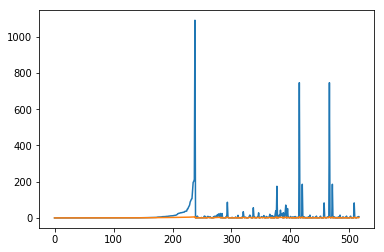

In [24]:
plt.plot(Y)
plt.plot(Y_transform)

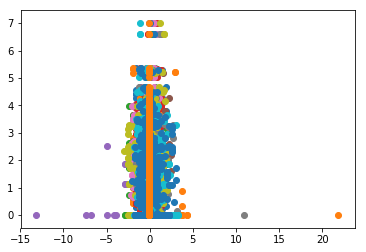

In [25]:
for i in range(12):
    plt.scatter(rescaledX[:,i],Y_transform)

#### Reflection
I used UCI Machine Learning Repositary to get the dataset of ForestFires. Then after exploring the data of this dataset, I changed non-integer values to integer. next, I visualized the features of the dataset. Some are skewed some are normal and so on.So, I preprocessed my data to get a standardised normal distribution of each and every feature. I also transformed my target variable using *log_transform* to get normal data. Now, I checked the score using my evaluation metrics i.e, explained_variance_score and mean_absolute_error by applying it to my benchmark model. After getting my benchmark score, I tried different regressors i.e, DecisionTreeRegressor and RandomForestRegressor to give an optimal solution. After I got the score of each model I chose DecisionTreeRegressor as solution model as it have high score and checked how robust it is, by using Mean and Variance method. Atlast I came with an Optimal model of DecisionTreeRegressor by using GridSearchCV to get best_estimator with optimal parameters and best solution for the problem. I faced some difficulty in preprocessing beacuse more features are skewed but some how I managed to complete it correctly. I found very interesting in getting score of 98.8% which makes feel great.

#### Improvement
I have my overall score close to *1.0*. But, we can get more closer score by including some more parameters in DecisionTreeRegressor and get optimal values of those parameters by using GridSearchCV which provides the best_estimator of the given model. We can also do more in datapreprocessing to get good standardised normal distribution of every features over target variable.By using better dataset and spliting the data by randomizing and shuffling we may get better results.

### JUSTIFICATION
Based on the final results we can see that the DecisionTreeRegressor managed to cross our benchmark model and has a score of 0.993. This dataset is well visualized and preprocessed in this project. From the final result I conclude that DecisionTreeRegressor is as efficient as remaining models.